In [9]:
import pandas as pd

In [10]:
# 1. Use pandas to create a Series from the following data:
# ["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]
# a. Name the variable that holds the series fruits.

# Name the variable that holds the series fruit
sfruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"])
type(sfruits)

pandas.core.series.Series

In [5]:
# b. Run .describe() on the series to see what describe returns for a series of strings.

# use describe function
sfruits.describe()


count       17
unique      13
top       kiwi
freq         4
dtype: object

In [39]:
# c. Run the code necessary to produce only the unique fruit names.

# use unique function
set = sfruits.unique()

In [41]:
# d. Determine how many times each value occurs in the series.

# use value_counts function
count = sfruits.value_counts()


kiwi                4
mango               2
tomato              1
papaya              1
strawberry          1
honeydew            1
blackberry          1
gala apple          1
watermelon          1
honeycrisp apple    1
blueberry           1
gooseberry          1
pineapple           1
dtype: int64

In [42]:
# e. Determine the most frequently occurring fruit name from the series.

# use series from above with counts and nlargest function, see Faith's notes
count.nlargest(1, keep='all')

kiwi    4
dtype: int64

In [43]:
# f. Determine the least frequently occurring fruit name from the series.

# use value counts series with nsmallest, see Faith's notes
count.nsmallest(1, keep='all')

tomato              1
papaya              1
strawberry          1
honeydew            1
blackberry          1
gala apple          1
watermelon          1
honeycrisp apple    1
blueberry           1
gooseberry          1
pineapple           1
dtype: int64

In [11]:
# g. Write the code to get the longest string from the fruits series.

# use max function
sfruits.max()
# per walk through this is incorrect

# correct solution
max(sfruits.to_list(), key = len)

'honeycrisp apple'

In [50]:
# h. Find the fruit(s) with 5 or more letters in the name.

# change set of uniqie names to pandas series
set_series = pd.Series(set)
# get list of true or false for names longer greater than or equal to 5 letters
bools = set_series.str.len() >= 5
# pass bools to set_series to get names
set_series[bools]

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9            blueberry
10          blackberry
11          gooseberry
12              papaya
dtype: object

In [51]:
# i. Capitalize all the fruit strings in the series.

sfruits.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

In [53]:
# j. Count the letter "a" in all the fruits (use string vectorization)

# exobrain https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.count.html
# use str.count attribute, use sum function for total count
sfruits.str.count('a').sum()


14

In [29]:
# k. Output the number of vowels in each and every fruit.

# bring in count vowels function from kaggle
def count_vowels(value):
    value = value.lower()
    vowel = ['a', 'e', 'i', 'o', 'u']
    count = 0
    for i in value:
        if i in vowel:
            count += 1
    return count

# this returns a summary of 8 fruits with 2 vowels each, 4 fruits with 4 vowels, etc
# sfruits.apply(count_vowels).value_counts()

# create lambda function to apply to series
fruit_vowel = sfruits.apply(lambda n: count_vowels(n))
print(fruit_vowel)

# SEE WALK THROUGH FOR ADDITIONAL WAYS TO DO THIS


0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64


In [68]:
# l. Use the .apply method and a lambda function to find the fruit(s) containing two or more "o"
# letters in the name.

# create lambda function to apply
two_o = sfruits.apply(lambda n: 'yes' if n.count('o') >= 2 else 'no')
# use two_o to index into list
sfruits[two_o == 'yes']

6         tomato
15    gooseberry
dtype: object

In [79]:
# m. Write the code to get only the fruits containing "berry" in the name

# exobrain https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.findall.html
# this is better https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html

berry = sfruits.str.contains('berry')
sfruits[berry]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

In [81]:
# n. Write the code to get only the fruits containing "apple" in the name

# use contains function like above
apple = sfruits.str.contains('apple')
sfruits[apple]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

In [150]:
# o. Which fruit has the highest amount of vowels?

# this gives a list of number of vowels per fruit. max, idmax, and len do not work
max_vowels = sfruits[max(sfruits.str.count('[aeiou]'))]
max_vowels

# from study group
# SEE ALSO WALK THROUGH NOTES

'honeycrisp apple'

In [100]:
# 2. Use pandas to create a Series from the following data:
# ['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']
# What is the data type of the series?

data = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'
])
data


0       $796,459.41
1           $278.60
2       $482,571.67
3     $4,503,915.98
4      $2,121,418.3
5      $1,260,813.3
6        $87,231.01
7     $1,509,175.45
8     $4,138,548.00
9     $2,848,913.80
10      $594,715.39
11    $4,789,988.17
12     $4,513,644.5
13    $3,191,059.97
14    $1,758,712.24
15    $4,338,283.54
16    $4,738,303.38
17    $2,791,759.67
18      $769,681.94
19      $452,650.23
dtype: object

In [105]:
# Use series operations to convert the series to a numeric data type.

# remove $ and , from numbers
data = data.str.replace('$', '')
data = data.str.replace(',', '')
# exobrain https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
data = pd.to_numeric(data)


0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64


In [107]:
# What is the maximum value? The minimum?

print(data.max(), data.min())

4789988.17 278.6


In [137]:
# Bin the data into 4 equally sized intervals and show how many values fall into each bin.

# use cut function with 4 bins
data_bins = pd.cut(data, 4)
print(data_bins)

# FROM WALK THROUGH ADD .VALUE_COUNTS().SORT_INDEX()

0        (-4511.11, 1197705.993]
1        (-4511.11, 1197705.993]
2        (-4511.11, 1197705.993]
3      (3592560.778, 4789988.17]
4     (1197705.993, 2395133.385]
5     (1197705.993, 2395133.385]
6        (-4511.11, 1197705.993]
7     (1197705.993, 2395133.385]
8      (3592560.778, 4789988.17]
9     (2395133.385, 3592560.778]
10       (-4511.11, 1197705.993]
11     (3592560.778, 4789988.17]
12     (3592560.778, 4789988.17]
13    (2395133.385, 3592560.778]
14    (1197705.993, 2395133.385]
15     (3592560.778, 4789988.17]
16     (3592560.778, 4789988.17]
17    (2395133.385, 3592560.778]
18       (-4511.11, 1197705.993]
19       (-4511.11, 1197705.993]
dtype: category
Categories (4, interval[float64]): [(-4511.11, 1197705.993] < (1197705.993, 2395133.385] < (2395133.385, 3592560.778] < (3592560.778, 4789988.17]]


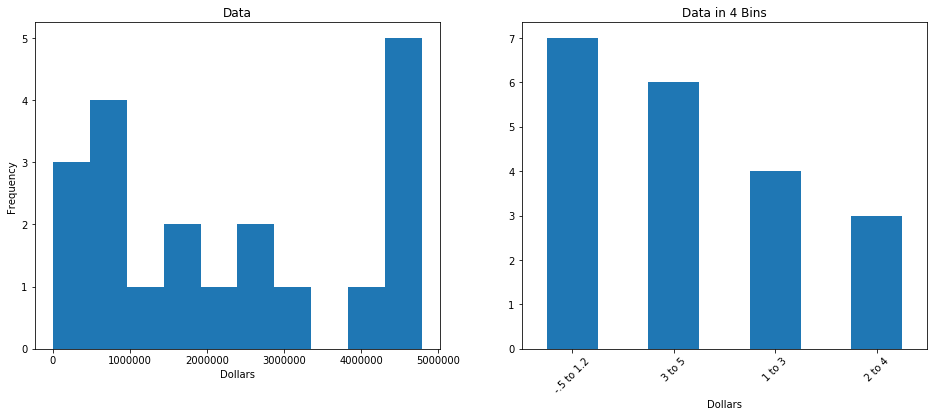

In [160]:
# Plot a histogram of the data. Be sure to include a title and axis labels.

# import matplotlib, not doing this produced histogram, but would not allow labels
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
data.plot.hist()
plt.title('Data')
plt.xlabel('Dollars')

plt.subplot(1, 2, 2)
data_bins.value_counts().plot.bar()
plt.xticks([0, 1, 2, 3], ['-.5 to 1.2', '3 to 5', '1 to 3', '2 to 4'], rotation = 45)
plt.title('Data in 4 Bins')
plt.xlabel('Million Dollars')
plt.show()

In [125]:
# 3. Use pandas to create a Series from the following exam scores:
# [60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]

scores = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78])

In [166]:
# What is the minimum exam score? The max, mean, median?
print("Min =", scores.min(), "Max=", scores.max(), "Mean=", scores.mean(), "Median=", scores.median())

Min = 60 Max= 96 Mean= 78.15 Median= 79.0


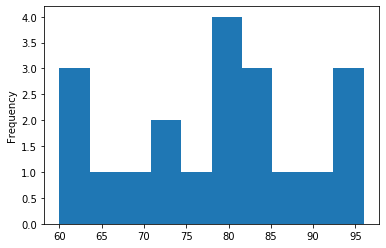

In [129]:
# Plot a histogram of the scores.
scores.plot.hist()

In [162]:
# Convert each of the numbers above into a letter grade. For example, 86 should be a 'B' and 95 should be an 'A'.

# bring in letter grade function from python exercises
def get_letter_grade(num):
    # assertion to verify input is an integer
    assert type(num) == int, "invalid input"
    # if statements to find letter grade, only need minimum score because higher numbers will have already
    # been assigned a letter
    if num >= 90:
        return("A")
    elif num >= 80:
        return("B")
    elif num >= 70:
        return("C")
    elif num >= 60:
        return("D")
    else:
        return("F")
    
letter_grades = scores.apply(lambda n: get_letter_grade(n))
letter_grades

0     D
1     B
2     C
3     D
4     A
5     C
6     D
7     B
8     A
9     C
10    D
11    C
12    D
13    B
14    A
15    B
16    B
17    A
18    B
19    C
dtype: object

In [168]:
# Write the code necessary to implement a curve. I.e. that grade closest to 100 should be converted to a 100,
# and that many points should be given to every other score as well.
curve = 100 - scores.max()
scores = scores + curve
print("Scores with curve:")
print("Min =", scores.min(), "Max=", scores.max(), "Mean=", scores.mean(), "Median=", scores.median())

Scores with curve:
Min = 64 Max= 100 Mean= 82.15 Median= 83.0


In [18]:
# 4. Use pandas to create a Series from the following string:
# 'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'

letters = pd.Series(list('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'))


In [28]:
# What is the most frequently occuring letter? Least frequently occuring?

# the trick here is to make sure the Series is a list and not a str or the values_counts() won't work
print(f'The most frequently occuring letter is {letters[letters.value_counts().max()]}.')
print(f'The least frequently occuring letter is {letters[letters.value_counts().min()]}.')    

The most frequently occuring letter is y.
The least frequently occuring letter is d.


In [33]:
# How many vowels are in the list?

# use count_vowels function to get 1 if character is a vowel and 0 if not
letters_vowels = letters.apply(lambda n: count_vowels(n))
# use .sum() to add for total
print(f'There are {letters_vowels.sum()} vowels in the list.')

There are 34 vowels in the list


In [35]:
# How many consonants are in the list?

# subtract count of vowels above from total count of list
consonants = len(letters) - letters_vowels.sum()
print(f'There are {consonants} in the list.')

# SEE WALK THROUGH FOR ANOTHER COOL WAY TO DO THIS

There are 166 in the list.


In [39]:
# Create a series that has all of the same letters, but uppercased

# for the .upper() to work must add .str 
uppercase_letters = letters.str.upper()
# show letters are now uppercase
print(uppercase_letters)
# verify type is series
print(type(uppercase_letters))

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object
<class 'pandas.core.series.Series'>


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

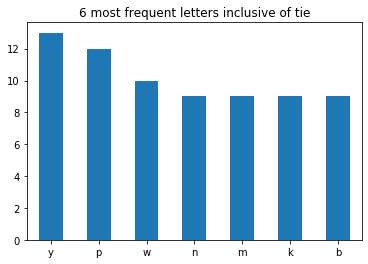

In [54]:
# Create a bar plot of the frequencies of the 6 most frequently occuring letters.

# use value_count and nlargest again, but get 6 largest instead of only 1
lettercount = letters.value_counts().nlargest(6, keep='all')
# decided to keep all of the letters tied with a count of 9

# create chart
lettercount.plot.bar()
# have to import matplotlib.pyplot to clean up presentation
import matplotlib.pyplot as plt
plt.title('6 most frequent letters inclusive of tie')
plt.xticks(rotation=0)

In [3]:
# 5. Complete the exercises from https://gist.github.com/ryanorsinger/f7d7c1dd6a328730c04f3dc5c5c69f3a, 
# but use pandas Series for the data structure instead of lists and use Series subsetting/indexing and 
# vectorization options instead of loops and lists.
import pandas as pd


In [13]:
# 17 list comprehension problems in python

fruits = ['mango', 'kiwi', 'strawberry', 'guava', 'pineapple', 'mandarin orange']

numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 19, 23, 256, -8, -4, -2, -5, -9]

# Example for loop solution to add 1 to each number in the list
numbers_plus_one = []
for number in numbers:
    numbers_plus_one.append(number + 1)

# Example of using a list comprehension to create a list of the numbers plus one.
numbers_plus_one = [number + 1 for number in numbers]

# Example code that creates a list of all of the list of strings in fruits and uppercases every string
output = []
for fruit in fruits:
    output.append(fruit.upper())
    

In [16]:
# Exercise 1 - rewrite the above example code using list comprehension syntax. 
# Make a variable named uppercased_fruits to hold the output of the list comprehension. 
# Output should be ['MANGO', 'KIWI', etc...]

# pandas is already imported, make fruits list a series
fruits = pd.Series(fruits)
# use .str with .upper to produce all uppercase
fruits.str.upper()

0              MANGO
1               KIWI
2         STRAWBERRY
3              GUAVA
4          PINEAPPLE
5    MANDARIN ORANGE
dtype: object

In [18]:
# Exercise 2 - create a variable named capitalized_fruits and use list comprehension syntax to produce 
# output like ['Mango', 'Kiwi', 'Strawberry', etc...]

# use .str with .capitalize to produce capitalized series
fruits.str.capitalize()

# .str.title() might be better
fruits.str.title()

0              Mango
1               Kiwi
2         Strawberry
3              Guava
4          Pineapple
5    Mandarin Orange
dtype: object

In [65]:
# Exercise 3 - Use a list comprehension to make a variable named fruits_with_more_than_two_vowels. 
# Hint: You'll need a way to check if something is a vowel.

# get a count of the vowels in each fruit in series
fruits_vowels = fruits.apply(lambda n: count_vowels(n))
# set requested variable to use above to index for fruits with more than 2 vowels, they all have more than 2 vowels
fruits_with_more_than_two_vowels = fruits[fruits_vowels >= 2]
# print variable to confirm results
print(fruits_with_more_than_two_vowels)

0              mango
1               kiwi
2         strawberry
3              guava
4          pineapple
5    mandarin orange
dtype: object


In [66]:
# Exercise 4 - make a variable named fruits_with_only_two_vowels. 
# The result should be ['mango', 'kiwi', 'strawberry']

# set requested variable using variable defined above to find == instead of >=
fruits_with_only_two_vowels = fruits[fruits_vowels == 2]
# print variable to confirm results
print(fruits_with_only_two_vowels)

0         mango
1          kiwi
2    strawberry
dtype: object


In [21]:
# Exercise 5 - make a list that contains each fruit with more than 5 characters

# find the length of all fruits in series
len_fruits = fruits.str.len()
# use that variable to list fruits where length > 5
more_than_5_char = fruits[len_fruits > 5]
# print variable to confirm results
print(more_than_5_char)

2         strawberry
4          pineapple
5    mandarin orange
dtype: object


In [22]:
# Exercise 6 - make a list that contains each fruit with exactly 5 characters

# use len_fruits variable as above, but where length == 5
exactly_5_char = fruits[len_fruits == 5]
# print variable to confirm results
print(exactly_5_char)

0    mango
3    guava
dtype: object


In [24]:
# Exercise 7 - Make a list that contains fruits that have less than 5 characters

# use len_fruits as above, but where length < 5
less_than_5_char = fruits[len_fruits < 5]
# print variable to confirm results
print(less_than_5_char)
less_than_5_char.dtype

1    kiwi
dtype: object


dtype('O')

In [73]:
# Exercise 8 - Make a list containing the number of characters in each fruit.
# Output would be [5, 4, 10, etc... ]

# to see this print len_fruits variable
print(len_fruits)

0     5
1     4
2    10
3     5
4     9
5    15
dtype: int64


In [76]:
# Exercise 9 - Make a variable named fruits_with_letter_a that contains a list of only the fruits
# that contain the letter "a"

# set requested variable, use .str.count to find count of letter a in each fruit
# use that to index list where count is greater than 0
fruits_with_letter_a = fruits[fruits.str.count('a') > 0]
# print variable to confirm results
print(fruits_with_letter_a)

0              mango
2         strawberry
3              guava
4          pineapple
5    mandarin orange
dtype: object


In [25]:
# Exercise 10 - Make a variable named even_numbers that holds only the even numbers 

# make numbers list into pandas series
numbers = pd.Series(numbers)

# set variable to requested use comparison operator to index for even
even_numbers = numbers[numbers % 2 == 0]
# print variable to confirm results
print(even_numbers)

0       2
2       4
4       6
6       8
8      10
14    256
15     -8
16     -4
17     -2
dtype: int64


In [122]:
# Exercise 11 - Make a variable named odd_numbers that holds only the odd numbers

# set variable to requested use comparison operator to index for odd
odd_numbers = numbers[numbers % 2 == 1]
# print variable to confirm results
print(odd_numbers)

1      3
3      5
5      7
7      9
9     11
10    13
11    17
12    19
13    23
18    -5
19    -9
dtype: int64


In [123]:
# Exercise 12 - Make a variable named positive_numbers that holds only the positive numbers

# set variable to requested use comparison operator to index for > 0
positive_numbers = numbers[numbers > 0]
# print variable to confirm results
print(positive_numbers)

0       2
1       3
2       4
3       5
4       6
5       7
6       8
7       9
8      10
9      11
10     13
11     17
12     19
13     23
14    256
dtype: int64


In [124]:
# Exercise 13 - Make a variable named negative_numbers that holds only the negative numbers

# set variable to requested use comparison operator to index for < 0
negative_numbers = numbers[numbers < 0]
# print variable to confirm results
print(negative_numbers)

15   -8
16   -4
17   -2
18   -5
19   -9
dtype: int64


In [125]:
# Exercise 14 - use a list comprehension w/ a conditional in order to produce a 
# list of numbers with 2 or more numerals

# use comparison operators with or
two_more_digits = numbers[(numbers < -9) | (numbers > 9)]
# print variable to confirm results, note: there aren't any numbers < -9 in the list
print(two_more_digits)

8      10
9      11
10     13
11     17
12     19
13     23
14    256
dtype: int64


In [7]:
# Exercise 15 - Make a variable named numbers_squared that contains the numbers 
# list with each element squared. Output is [4, 9, 16, etc...]

# pandas makes this almost too easy...
numbers_squared = numbers ** 2
numbers_squared

0         4
1         9
2        16
3        25
4        36
5        49
6        64
7        81
8       100
9       121
10      169
11      289
12      361
13      529
14    65536
15       64
16       16
17        4
18       25
19       81
dtype: int64

In [127]:
# Exercise 16 - Make a variable named odd_negative_numbers that contains only the numbers that are both 
# odd and negative.

# use comparison operators with and
odd_negative_numbers = numbers[(numbers < 0) & (numbers % 2 == 1)]
# print variable to confirm results
print(odd_negative_numbers)

18   -5
19   -9
dtype: int64


In [128]:
# Exercise 17 - Make a variable named numbers_plus_5. In it, return a list containing each number plus five. 

# pandas will make this easy
numbers_plus_5 = numbers + 5
# print variable to confirm results
print(numbers_plus_5)

0       7
1       8
2       9
3      10
4      11
5      12
6      13
7      14
8      15
9      16
10     18
11     22
12     24
13     28
14    261
15     -3
16      1
17      3
18      0
19     -4
dtype: int64


In [130]:
# BONUS Make a variable named "primes" that is a list containing the prime numbers in the numbers list. 
# *Hint* you may want to make or find a helper function that determines if a given number is prime or not.

# bring in previously defined function to find primes
def is_prime(num):
    if num <= 1:
        return False
    for i in range(2, num):
        if (num % i) == 0:
            return False
    else:
        return True

# apply function to get list of bool for which in series are prime
bools = numbers.apply(is_prime)
# check bools list, primes function not handling negative numbers
# print(bools) -- commented out once bools list is clean
# use bools to get list of primes 
primes = numbers[bools]
# print to verify results
print(primes)

0      2
1      3
3      5
5      7
9     11
10    13
11    17
12    19
13    23
dtype: int64
